In [1]:
from pathlib import Path
import json

from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cblearn.metrics import query_error

import datasets


sns.set_theme("paper", "whitegrid", font_scale=1.5)
plot_dir = Path('../plots')
plot_dir.mkdir(exist_ok=True)

## Plot datasets

In [2]:
data = datasets.fetch_all()
data = pd.DataFrame.from_records(data).transpose()
data['n_triplets'] = data.train_triplets.map(len)
data

,train_triplets,n_objects,n_triplets
car,"[[30, 43, 19], [45, 0, 9], [22, 36, 19], [33, ...",59,14194
food,"[[70, 19, 67], [77, 46, 75], [30, 2, 99], [50,...",99,190376
imagenet-v1,"[[329, 328, 114], [329, 328, 76], [329, 328, 3...",999,328549
imagenet-v2,"[[884, 663, 506], [884, 663, 148], [884, 663, ...",49999,4995601
material,"[[0, 22, 90], [4, 65, 98], [43, 15, 71], [62, ...",99,92892
musician,"[[196, 198, 35], [129, 131, 271], [6, 411, 230...",447,131970
nature,"[[66, 13, 7], [111, 100, 51], [101, 93, 100], ...",119,3355
things,"[[1523, 914, 810], [1667, 530, 1610], [939, 12...",1853,292024
vogue,"[[33, 24, 0], [47, 54, 51], [15, 25, 13], [21,...",59,1107


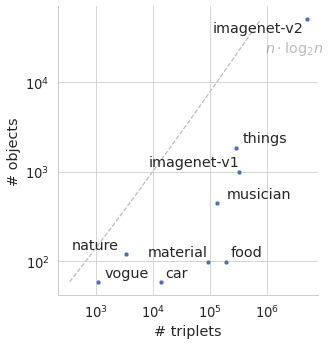

In [3]:
names = data.index
fg = sns.relplot(data, x='n_triplets', y='n_objects', legend=None)
fg.set(xlabel='# triplets', ylabel='# objects', xscale='log', yscale='log')

obj_space = np.linspace(np.min(data.n_objects), np.max(data.n_objects), 1000)
triplet_space = obj_space * np.log2(obj_space)
plt.plot(triplet_space, obj_space, 'k--', alpha=0.3, zorder=-1)    

labels = []
labels.append(plt.text(triplet_space[-400], obj_space[-600], f"$n\cdot \log_2 n$", alpha=0.3, horizontalalignment='right'))
labels = labels + [plt.text(x, y, name) for name, x, y in zip(names, data.n_triplets, data.n_objects)]
adjust_text(labels, expand_points=(1.3, 1.3))

fg.savefig(plot_dir / 'datasets.pdf')
fg.savefig(plot_dir / 'datasets.png')
plt.show()

## Load results

In [4]:
results = []
for r in Path('../results').glob('*.json'):
    with r.open('r') as f:
        d = json.load(f)
    d['error'] = query_error(data.loc['car', 'train_triplets'], d['embedding'])
    del d['embedding']
    if d['library'] == 'cblearn':
        d['name'] = f"{d['algorithm']} (ours)"
    else:
        d['name'] = f"{d['algorithm']}"
    results.append(d)
    
results = pd.DataFrame.from_records(results)
results = results.join(data, on='dataset')
results

,dataset,library,algorithm,loss,cpu_time,error,name,train_triplets,n_objects,n_triplets
0,material,cblearn,CKL,25742.909753,3.281760,0.460969,CKL (ours),"[[0, 22, 90], [4, 65, 98], [43, 15, 71], [62, ...",99,92892
1,nature,cblearn,SOE,0.006829,0.777877,0.497675,SOE (ours),"[[66, 13, 7], [111, 100, 51], [101, 93, 100], ...",119,3355
2,nature,cblearn,STE,NaN,0.041110,0.524236,STE (ours),"[[66, 13, 7], [111, 100, 51], [101, 93, 100], ...",119,3355
3,nature,cblearn,tSTE,2091.866596,0.066720,0.487530,tSTE (ours),"[[66, 13, 7], [111, 100, 51], [101, 93, 100], ...",119,3355
4,car,cblearn,tSTE,7286.264620,0.392803,0.215232,tSTE (ours),"[[30, 43, 19], [45, 0, 9], [22, 36, 19], [33, ...",59,14194
5,vogue,cblearn,CKL,506.689468,0.127988,0.514161,CKL (ours),"[[33, 24, 0], [47, 54, 51], [15, 25, 13], [21,...",59,1107
6,vogue,cblearn,SOE,0.005944,0.261657,0.491687,SOE (ours),"[[33, 24, 0], [47, 54, 51], [15, 25, 13], [21,...",59,1107
7,material,cblearn,SOE,0.003919,9.096893,0.482951,SOE (ours),"[[0, 22, 90], [4, 65, 98], [43, 15, 71], [62, ...",99,92892
8,car,cblearn,CKL,6701.799283,0.236373,0.198182,CKL (ours),"[[30, 43, 19], [45, 0, 9], [22, 36, 19], [33, ...",59,14194
9,vogue,cblearn,STE,1763.462917,0.050521,0.495562,STE (ours),"[[33, 24, 0], [47, 54, 51], [15, 25, 13], [21,...",59,1107


## Plot results

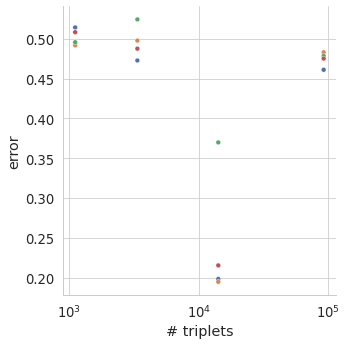

In [5]:
fg = sns.relplot(results, x='n_triplets', y='error', hue='name', legend=None)
fg.set(xlabel='# triplets', ylabel='error', xscale='log')

#labels = [plt.text(x, y, name) for name, x, y in zip(results.algorithm, results.n_triplets, results.error)]
#adjust_text(labels, expand_points=(1.3, 1.3))

fg.savefig(plot_dir / 'benchmark_error.pdf')
fg.savefig(plot_dir / 'benchmark_error.png')
plt.show()

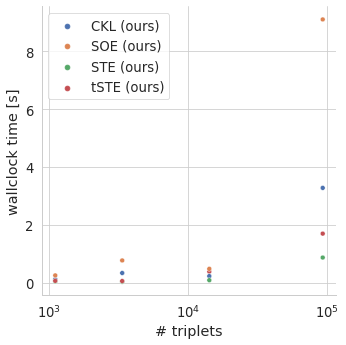

In [13]:
fg = sns.relplot(results, x='n_triplets', y='cpu_time', hue='name', facet_kws=dict(legend_out=False))
fg.set(xlabel='# triplets', ylabel='wallclock time [s]', xscale='log')
fg.legend.set_title('')
#sns.move_legend(fg, 'best', title=None)

#labels = [plt.text(x, y, name) for name, x, y in zip(results.algorithm, results.n_triplets, results.error)]
#adjust_text(labels, expand_points=(1.3, 1.3))

fg.savefig(plot_dir / 'benchmark_time.pdf')
fg.savefig(plot_dir / 'benchmark_time.png')
plt.show()